# Time Series Forecast Study with Python: Monthly Sales of French Champagne

# Problem Description

The problem is to predict the number of monthly sales of champagne for the Perrin Freres label (named for a region in France).

The dataset provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 10 years of data.

The values are a count of millions of sales and there are 105 observations.

#### The steps of this project that we will through are as follows.

Environment.

Problem Description.

Test Harness.

Persistence.

Data Analysis

ARIMA Models.

Model Validation.

#### 1. Environment

In [4]:
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy as np
print('numpy: %s' % np.__version__)
# matplotlib'
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas as pd
print('pandas: %s' % pd.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
%matplotlib inline

scipy: 0.19.1
numpy: 1.13.1
matplotlib: 2.0.2
pandas: 0.20.3
sklearn: 0.19.0
statsmodels: 0.9.0


# Load Data

In [5]:
df = pd.read_csv('champagne.csv', header=0)
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


# Test Harness

We must develop a test harness to investigate the data and evaluate candidate models.

This involves two steps:

Defining a Validation Dataset.
Developing a Method for Model Evaluation.

In [6]:
split_point = len(df) - 12
dataset, validation = df.loc[0:split_point], df.loc[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv',index=False)
validation.to_csv('validation.csv',index=False)

Dataset 94, Validation 12


# Summary Statistics

In [7]:
df_data = pd.read_csv('dataset.csv')
df_data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
Month                                                     94 non-null object
Perrin Freres monthly champagne sales millions ?64-?72    94 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [9]:
from pandas import datetime

def parser(x):
    return pd.datetime.strptime(x, '%Y-%m')

In [10]:
parser('1964-01')

datetime.datetime(1964, 1, 1, 0, 0)

In [11]:
df_data['Month'] = df_data['Month'].apply(lambda x : parser(x))

In [12]:
df_data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [13]:
df_data = df_data.set_index(df_data['Month'])

In [14]:
df_data.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,94.000000
mean,4666.010638
std,2484.748262
min,1573.000000
25%,3049.000000
50%,4031.500000
75%,5170.250000
max,13916.000000


In [15]:
df_data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01', '1965-11-01', '1965-12-01',
               '1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
               '1966-09-01', '1966-10-01', '1966-11-01', '1966-12-01',
               '1967-01-01', '1967-02-01', '1967-03-01', '1967-04-01',
               '1967-05-01', '1967-06-01', '1967-07-01', '1967-08-01',
               '1967-09-01', '1967-10-01', '1967-11-01', '1967-12-01',
               '1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
      

In [16]:
ts = df_data['Perrin Freres monthly champagne sales millions ?64-?72']


In [17]:
ts['1971-09-01']

5951

# Plotting  Time-Series


#### Note :

Plotting the data is arguably the most critical step in the exploratory analysis phase. 
This enables us to make inferences about important components of the time-series data, such as trend, seasonality, heteroskedasticity, and stationarity. Here is a quick summary of each:



* Trend: we say that a dataset has a trend when it has either a long-term increase or decrease.

* Seasonality: we say that a dataset has seasonality when it has patterns that repeat over known, fixed periods of time (e.g. monthly, quarterly, yearly).

* Heteroskedasticity: we say that a data is heteroskedastic when its variability is not constant (i.e. its variance increases or decreases as a function of the explanatory variable).

* Stationarity: a stochastic process is called stationary if the mean and variance are constant (i.e. their joint distribution does not change over time).

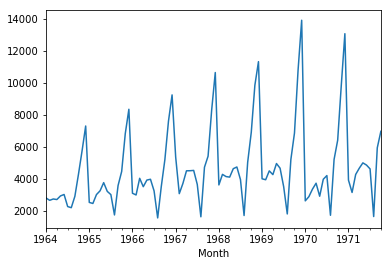

In [18]:
ts.plot()

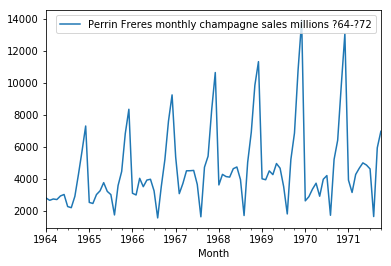

In [19]:
df_data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A36D7F0>]], dtype=object)

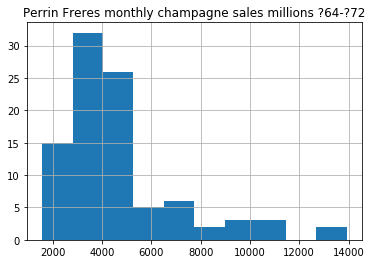

In [20]:
df_data.hist()
#plt.show()

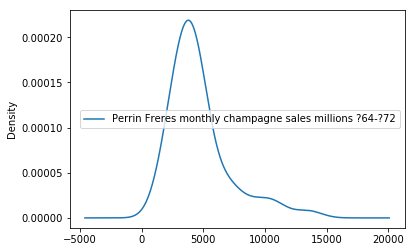

In [21]:
df_data.plot(kind='kde')

# ARIMA Models

In this section, we will develop Autoregressive Integrated Moving Average, or ARIMA, models for the problem.

We will approach modeling by both manual and automatic configuration of the ARIMA model. This will be followed by a third step of investigating the residual errors of the chosen model.

As such, this section is broken down into 3 steps:

* Manually Configure the ARIMA.
* Automatically Configure the ARIMA.
* Review Residual Errors.

# Check the Stationarity of the data

In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(timeseries)
    print('\nAugmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
    for key,value in result[4].items():
        print('Critical Value (%s) = %s'%(key,value))
        
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


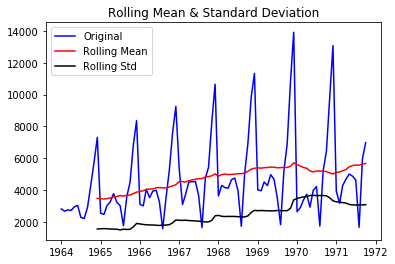


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.43073205825
p-value : 0.567457362313
#Lags Used : 11
Number of Observations Used : 82
Critical Value (1%) = -3.51273805698
Critical Value (5%) = -2.89748986506
Critical Value (10%) = -2.5859487329
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [23]:
test_stationarity(ts)

#### Note :

Since Test Statistics is higher than Critical Value hence given raw time series is not stationaray

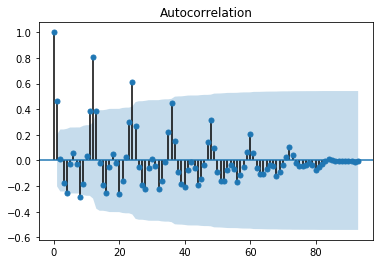

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(ts)
plt.show()

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


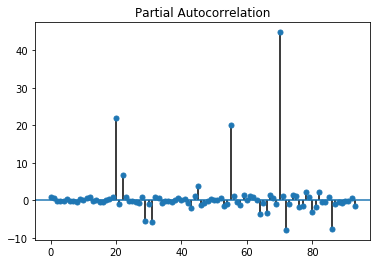

In [25]:
plot_pacf(ts)
plt.show()

# How to make a Time Series Stationary?

#### Note :

Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. 

There are 2 major reasons behind non-stationaruty of a Time Series:
    
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.

2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.


Eliminating Trend and Seasonality
====================================================================================
Lets discuss two ways of removing trend and seasonality:

1 . Differencing – taking the differece with a particular time lag

2 .  Decomposition – modeling both trend and seasonality and removing them from the model.

# Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. 

First order differencing can be done in Pandas as executed in the cell below

In [26]:
ts_log_diff = ts - ts.shift()

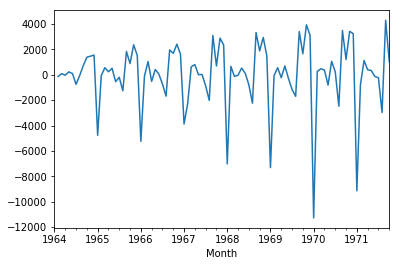

In [27]:
ts_log_diff.plot()

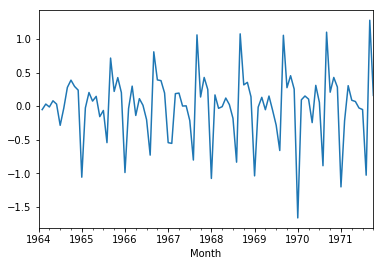

In [28]:
ts_log = np.log(ts)
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.plot()

#### Note :
This appears to have reduced trend considerably. Lets verify using our plots

In [29]:
ts_log_diff.head()

Month
1964-01-01         NaN
1964-02-01   -0.052135
1964-03-01    0.030590
1964-04-01   -0.012418
1964-05-01    0.079449
Name: Perrin Freres monthly champagne sales millions ?64-?72, dtype: float64

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


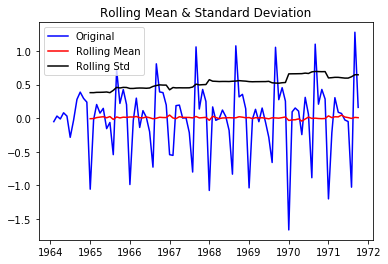


Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.11783869948
p-value : 0.000904816588095
#Lags Used : 12
Number of Observations Used : 80
Critical Value (1%) = -3.51486920508
Critical Value (5%) = -2.89840851563
Critical Value (10%) = -2.58643890625
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [30]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

#### Note :

Since Test Statistics is lower than Critical Value hence given raw time series is  stationaray


# Decomposing
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

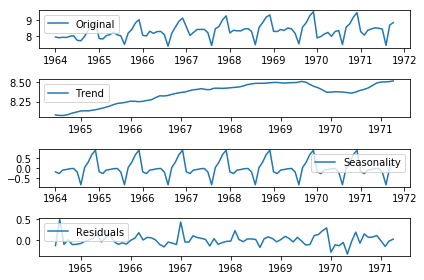

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residual

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


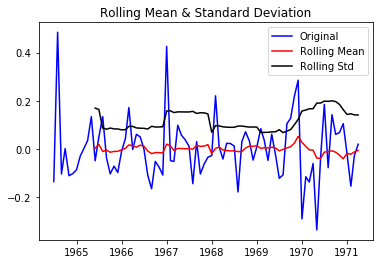


Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.8893658469
p-value : 2.94929809406e-07
#Lags Used : 7
Number of Observations Used : 74
Critical Value (1%) = -3.52198031755
Critical Value (5%) = -2.90147010977
Critical Value (10%) = -2.58807215486
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [32]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


#### Note :

Since Test Statistics is lower than Critical Value hence given raw time series is stationaray


# Autocorelation plots and Partial Autocorelation plots

#### An importance concern here is how to determine the value of ‘p’ and ‘q’. 


We use two plots to determine these numbers. Lets discuss them first.

* Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

* Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

The ACF and PACF plots for the TS after differencing can be plotted as:

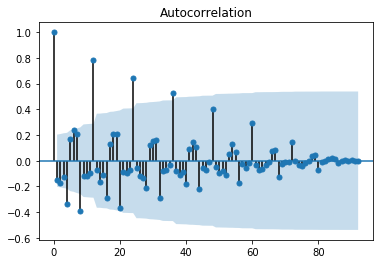

In [33]:
plot_acf(ts_log_diff)
plt.show()

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


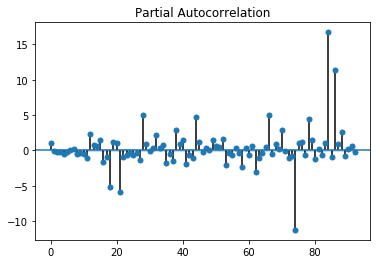

In [34]:
plot_pacf(ts_log_diff)
plt.show()

In [35]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=9)
lag_pacf = pacf(ts_log_diff, nlags=9, method='ols')

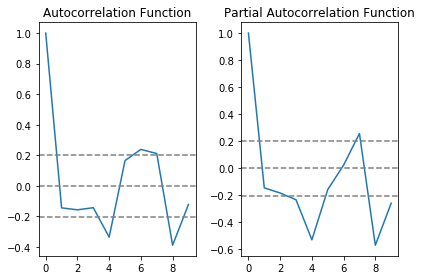

In [125]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### Note

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

* p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.

* q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


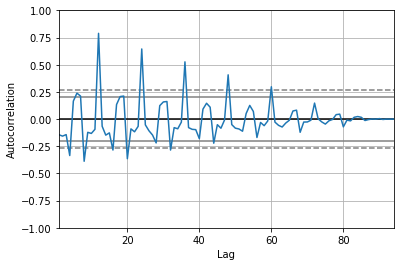

In [119]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(ts_log_diff)

In [2]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model

                                                ARIMA Model Results                                                 
Dep. Variable:     D.Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                   93
Model:                                                       ARIMA(1, 1, 0)   Log Likelihood                 -94.950
Method:                                                             css-mle   S.D. of innovations              0.671
Date:                                                      Mon, 01 Oct 2018   AIC                            195.901
Time:                                                              16:51:54   BIC                            203.498
Sample:                                                          03-01-1964   HQIC                           198.968
                                                               - 11-01-1971                                         
                                                                

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


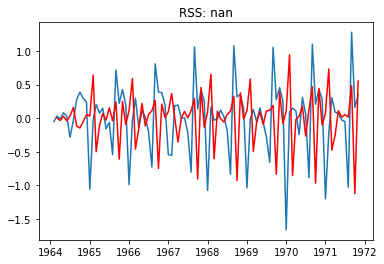

In [165]:
model = ARIMA(ts_log_diff, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
print(results_AR.summary())
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# MA Model

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                                ARIMA Model Results                                                 
Dep. Variable:     D.Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                   94
Model:                                                       ARIMA(0, 1, 1)   Log Likelihood                 -61.527
Method:                                                             css-mle   S.D. of innovations              0.454
Date:                                                      Mon, 01 Oct 2018   AIC                            129.054
Time:                                                              16:52:31   BIC                            136.684
Sample:                                                          02-01-1964   HQIC                           132.136
                                                               - 11-01-1971                                         
                                                                

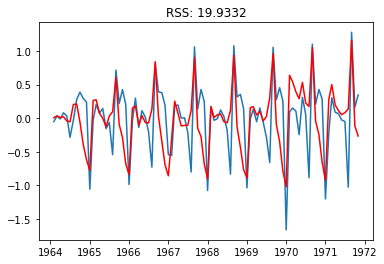

In [166]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1) 
print(results_MA.summary())
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# Combined Model

In [79]:
import warnings
warnings.filterwarnings("ignore")
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            model = ARIMA(ts_log, order=order)
            results_ARIMA = model.fit(disp=0)
            mse = sum((results_ARIMA.fittedvalues-ts_log_diff).dropna()**2)
            if mse < best_score:
                best_score, best_cfg = mse, order
            print('ARIMA%s RMSE=%.3f' % (order,mse))  
print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

ARIMA(0, 0, 0) RMSE=6466.137
ARIMA(0, 0, 1) RMSE=6477.702
ARIMA(0, 1, 0) RMSE=24.140
ARIMA(0, 1, 1) RMSE=19.550
ARIMA(1, 0, 0) RMSE=6476.750
ARIMA(1, 0, 1) RMSE=6475.758
ARIMA(1, 1, 0) RMSE=23.620
ARIMA(1, 1, 1) RMSE=16.922
Best ARIMA(1, 1, 1) RMSE=16.922


                                                ARIMA Model Results                                                 
Dep. Variable:     D.Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                   81
Model:                                                       ARIMA(1, 1, 1)   Log Likelihood                  49.274
Method:                                                             css-mle   S.D. of innovations              0.128
Date:                                                      Mon, 01 Oct 2018   AIC                            -90.548
Time:                                                              20:23:15   BIC                            -80.970
Sample:                                                          08-01-1964   HQIC                           -86.705
                                                               - 04-01-1971                                         
                                                                

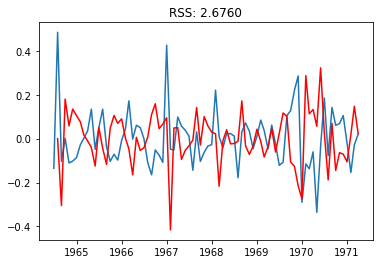

In [80]:

model = ARIMA(ts_log_decompose, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=0) 
print(results_ARIMA.summary())
plt.plot(ts_log_decompose)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_decompose).dropna()**2))

In [75]:
results_ARIMA.fittedvalues.head()

Month
1964-08-01   -0.000127
1964-09-01   -0.305018
1964-10-01    0.180197
1964-11-01    0.057943
1964-12-01    0.134491
dtype: float64

In [76]:
ts_log_decompose.head()

Month
1964-07-01   -0.135186
1964-08-01    0.484764
1964-09-01   -0.103818
1964-10-01    0.001495
1964-11-01   -0.110880
Name: Perrin Freres monthly champagne sales millions ?64-?72, dtype: float64

                                                ARIMA Model Results                                                 
Dep. Variable:     D.Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                   93
Model:                                                       ARIMA(1, 1, 0)   Log Likelihood                 -68.243
Method:                                                             css-mle   S.D. of innovations              0.504
Date:                                                      Mon, 01 Oct 2018   AIC                            142.485
Time:                                                              20:20:01   BIC                            150.083
Sample:                                                          02-01-1964   HQIC                           145.553
                                                               - 10-01-1971                                         
                                                                

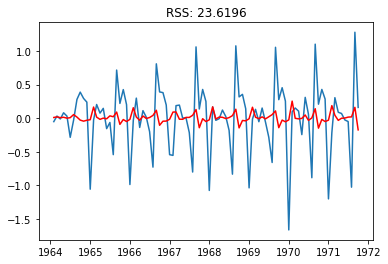

In [71]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1) 
print(results_ARIMA.summary())
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff).dropna()**2))

Here we can see that the AR and MA models have almost the same RSS but combined is significantly better. 


Now, we are left with 1 last step, i.e. taking these values back to the original scale.

# Taking it back to original scale
Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.

In [81]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1964-08-01   -0.000127
1964-09-01   -0.305018
1964-10-01    0.180197
1964-11-01    0.057943
1964-12-01    0.134491
dtype: float64


Notice that these start from ‘1964-02-01’ and not the first month. Why? 

This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from.

The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [82]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1964-08-01   -0.000127
1964-09-01   -0.305146
1964-10-01   -0.124949
1964-11-01   -0.067006
1964-12-01    0.067485
dtype: float64

Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [83]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1964-01-01    7.942718
1964-02-01    7.942718
1964-03-01    7.942718
1964-04-01    7.942718
1964-05-01    7.942718
dtype: float64

Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the exponent and compare with the original series.

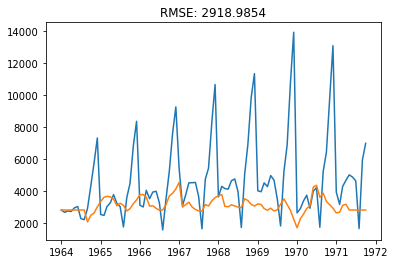

In [89]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts).dropna()**2)/len(ts)))

# CONCLUSION :
    
we have a time series forecast but the forecast is not that good.